# CHICAGO CRIME ARREST PREDICTION
>Business understanding

- Overview
 - Challanges
 -  Proposed solution
 - Brief conclusion

 - Problem statement
 - Objectives
>> 

## Data Understanding

The chicago crime data is got from https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2/about_data

The city of Chicago portal for the year 2024

It contains features such as 
Here are the columns that I have chosen to include (after carefully eliminating a few others):

- Date: This column represents the timestamp of the incident. From this column, I have extracted the Month, Day, and Hour information. We can also add additional time-based columns such as Week and Day of the Week, among others.
- Block: This column provides a partially redacted address where the incident occurred, indicating the same block as the actual address.
- IUCR: The acronym stands for Illinois Uniform Crime Reporting. This code is directly linked to the Primary Type and Description. You can find more information about it in this link.
- Primary Type: This column describes the primary category of the IUCR code mentioned above.
- Description: This column provides a secondary description of the IUCR code, serving as a subcategory of the primary description.
- Location Description: Here, you can find the description of the location where the incident took place.
- Arrest: This column indicates whether an arrest was made in relation to the incident.
- Domestic: It shows whether the incident was domestic-related, as defined by the Illinois Domestic Violence Act.
- Beat: The beat refers to the smallest police geographic area, with each beat having a dedicated territory. You can find more information about it in this link.
- District: This column represents the police district where the incident occurred.
- Ward: It refers to the number that labels the City Council district where the incident took place.
- Community Areas: This column indicates the community area where the incident occurred. Chicago has a total of 77 community areas.
- FBI Code: The crime classification outlined in the FBI's National Incident-Based Reporting System (NIBRS).
- X-Coordinate, Y-Coordinate, Latitude, Longitude, Location: These columns provide information about the geographical coordinates of the incident location, including latitude and longitude. The "Location" column contains just the latitude and longitude coordinates.
- Year, Updated On: These columns represent the year of the incident and the date on which the dataset was last updated.

## Data preparation

### Importing necessary libraries

In the following cell, we are importing several libraries that we will use throughout this notebook. Libraries like `numpy` and `pandas` are fundamental for data manipulation and analysis. `matplotlib` and `seaborn` are used for data visualization.`sklearn` provides tools for data mining and data analysis.

In [38]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
#from sklearn.model_selection import logisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

### Data overview

Define classes for data loading, preparation and cleaning

In [75]:
class DataLoader:
    def __init__(self, file_path):
        self.file_path = file_path
        self.data = None
        
    #Load data from CSV file.
    def load_data(self):
        self.data = pd.read_csv(self.file_path)
        print("Data loaded successfully.")
    
        
    def display_head(self, n=5):
        print(self.data.head(n))

    # describe data
    def describe_data(self):
        print(self.data.describe().transpose())
    
    # Provide info about the DataFrame.
    def info_data(self):
        print(self.data.info())

    # check missing values
    def check_missing_values(self):
        print(self.data.isnull().sum())
        
    # Drop missing values
    def drop_missing_values(self):
        self.data.dropna(inplace=True)
        return self.data

    # Check for duplicate rows in the DataFrame.
    def check_duplicates(self):
        duplicates = self.data.duplicated()
        print(f"Number of duplicate rows = {duplicates.sum()}")
        
    # Encode ARREST column: TRUE to 1, FALSE to 0
    def encode_arrest(self):
        self.data['Arrest'] = self.data['Arrest'].astype(int)
        
        
    # Extract month from date column
    def extract_month(self, date_column):
        self.data[date] = pd.to_datetime(self.data[date])
        self.data['month'] = self.data[date_column].dt.month
        

# execution:
file_path = 'Crimes_-_2024_20240607.csv'
data_loader = DataLoader(file_path)
data_loader.load_data()
data_loader.display_head()
data_loader.describe_data()
data_loader.info_data()
data_loader.check_missing_values()
data_loader.check_duplicates()


Data loaded successfully.
         ID Case Number                    Date                   Block  IUCR  \
0  13477487    JH283625  05/29/2024 12:00:00 AM    034XX W DIVERSEY AVE  0820   
1  13477597    JH284632  05/29/2024 12:00:00 AM  011XX S CALIFORNIA AVE  0820   
2  13476431    JH283168  05/29/2024 12:00:00 AM      036XX W AINSLIE ST  1330   
3  13478047    JH285292  05/29/2024 12:00:00 AM       060XX W GRAND AVE  2826   
4  13477155    JH284171  05/29/2024 12:00:00 AM       002XX S WACKER DR  1330   

        Primary Type                     Description  \
0              THEFT                  $500 AND UNDER   
1              THEFT                  $500 AND UNDER   
2  CRIMINAL TRESPASS                         TO LAND   
3      OTHER OFFENSE  HARASSMENT BY ELECTRONIC MEANS   
4  CRIMINAL TRESPASS                         TO LAND   

           Location Description  Arrest  Domestic  ...  Ward  Community Area  \
0              DEPARTMENT STORE   False     False  ...    35          

We can see that we have a few missing values on Location such as , X and Y coordinate latitude,longitude and location

Lets remove the missing values.

In [76]:
data_loader.drop_missing_values()
data_loader.check_missing_values()


ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64


In [96]:
# Create a new DataFrame once missing values are dropped
cleaned_data = data_loader.data
cleaned_data.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,month
0,13477487,JH283625,2024-05-29,034XX W DIVERSEY AVE,0820,THEFT,$500 AND UNDER,DEPARTMENT STORE,0,False,...,22,06,1153078.0,1918408.0,2024,06/05/2024 03:41:03 PM,41.931963,-87.712876,POINT (-87.712876373 41.931962854),5
1,13477597,JH284632,2024-05-29,011XX S CALIFORNIA AVE,0820,THEFT,$500 AND UNDER,APARTMENT,0,True,...,29,06,1157861.0,1895062.0,2024,06/05/2024 03:41:03 PM,41.867803,-87.695937,POINT (-87.695936906 41.867803094),5
2,13476431,JH283168,2024-05-29,036XX W AINSLIE ST,1330,CRIMINAL TRESPASS,TO LAND,APARTMENT,0,False,...,14,26,1151380.0,1932317.0,2024,06/05/2024 03:41:03 PM,41.970164,-87.718750,POINT (-87.718749784 41.970163724),5
3,13478047,JH285292,2024-05-29,060XX W GRAND AVE,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,APARTMENT,0,False,...,19,26,1135571.0,1914247.0,2024,06/05/2024 03:41:03 PM,41.920874,-87.777312,POINT (-87.777312117 41.92087423),5
4,13477155,JH284171,2024-05-29,002XX S WACKER DR,1330,CRIMINAL TRESPASS,TO LAND,COMMERCIAL / BUSINESS OFFICE,1,False,...,32,26,1173971.0,1899133.0,2024,06/05/2024 03:41:03 PM,41.878631,-87.636673,POINT (-87.636673298 41.878630716),5


Drop unnecessary columns

In [116]:
clean_data = cleaned_data.drop(columns = ['ID', 'Case Number','Updated On'])
clean_data

,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,month
0,2024-05-29,034XX W DIVERSEY AVE,0820,THEFT,$500 AND UNDER,DEPARTMENT STORE,0,False,1412,14,35,22,06,1153078.0,1918408.0,2024,41.931963,-87.712876,POINT (-87.712876373 41.931962854),5
1,2024-05-29,011XX S CALIFORNIA AVE,0820,THEFT,$500 AND UNDER,APARTMENT,0,True,1135,11,28,29,06,1157861.0,1895062.0,2024,41.867803,-87.695937,POINT (-87.695936906 41.867803094),5
2,2024-05-29,036XX W AINSLIE ST,1330,CRIMINAL TRESPASS,TO LAND,APARTMENT,0,False,1712,17,33,14,26,1151380.0,1932317.0,2024,41.970164,-87.718750,POINT (-87.718749784 41.970163724),5
3,2024-05-29,060XX W GRAND AVE,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,APARTMENT,0,False,2512,25,36,19,26,1135571.0,1914247.0,2024,41.920874,-87.777312,POINT (-87.777312117 41.92087423),5
4,2024-05-29,002XX S WACKER DR,1330,CRIMINAL TRESPASS,TO LAND,COMMERCIAL / BUSINESS OFFICE,1,False,122,1,42,32,26,1173971.0,1899133.0,2024,41.878631,-87.636673,POINT (-87.636673298 41.878630716),5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99529,2024-01-01,013XX W WASHINGTON BLVD,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,APARTMENT,0,False,1224,12,27,28,11,1167314.0,1900642.0,2024,41.882917,-87.661073,POINT (-87.661072905 41.882917205),1
99530,2024-01-01,039XX W 86TH ST,1750,OFFENSE INVOLVING CHILDREN,CHILD ABUSE,RESIDENCE,0,True,834,8,18,70,08B,1151518.0,1847241.0,2024,41.736702,-87.720475,POINT (-87.720475082 41.736702191),1
99531,2024-01-01,113XX S ABERDEEN ST,0810,THEFT,OVER $500,RESIDENCE,0,False,2234,22,21,75,06,1171027.0,1829400.0,2024,41.687340,-87.649519,POINT (-87.649519217 41.687340346),1
99532,2024-01-01,085XX S DAMEN AVE,2820,OTHER OFFENSE,TELEPHONE THREAT,OTHER (SPECIFY),0,False,614,6,18,71,08A,1164514.0,1847842.0,2024,41.738088,-87.672845,POINT (-87.672844688 41.738087606),1


### Encoding 

Converted Arrest column to integers from True - 1 and False - 0
> 1 represents arrest was made

> 0 represents arrest was not made

In [117]:
# Encode ARREST column
data_loader.encode_arrest()
clean_data.head()

,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,month
0,2024-05-29,034XX W DIVERSEY AVE,0820,THEFT,$500 AND UNDER,DEPARTMENT STORE,0,False,1412,14,35,22,06,1153078.0,1918408.0,2024,41.931963,-87.712876,POINT (-87.712876373 41.931962854),5
1,2024-05-29,011XX S CALIFORNIA AVE,0820,THEFT,$500 AND UNDER,APARTMENT,0,True,1135,11,28,29,06,1157861.0,1895062.0,2024,41.867803,-87.695937,POINT (-87.695936906 41.867803094),5
2,2024-05-29,036XX W AINSLIE ST,1330,CRIMINAL TRESPASS,TO LAND,APARTMENT,0,False,1712,17,33,14,26,1151380.0,1932317.0,2024,41.970164,-87.718750,POINT (-87.718749784 41.970163724),5
3,2024-05-29,060XX W GRAND AVE,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,APARTMENT,0,False,2512,25,36,19,26,1135571.0,1914247.0,2024,41.920874,-87.777312,POINT (-87.777312117 41.92087423),5
4,2024-05-29,002XX S WACKER DR,1330,CRIMINAL TRESPASS,TO LAND,COMMERCIAL / BUSINESS OFFICE,1,False,122,1,42,32,26,1173971.0,1899133.0,2024,41.878631,-87.636673,POINT (-87.636673298 41.878630716),5


Extracted month from Date column

In [118]:
data_loader.extract_month('Date')
clean_data.tail()

,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,month
99529,2024-01-01,013XX W WASHINGTON BLVD,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,APARTMENT,0,False,1224,12,27,28,11,1167314.0,1900642.0,2024,41.882917,-87.661073,POINT (-87.661072905 41.882917205),1
99530,2024-01-01,039XX W 86TH ST,1750,OFFENSE INVOLVING CHILDREN,CHILD ABUSE,RESIDENCE,0,True,834,8,18,70,08B,1151518.0,1847241.0,2024,41.736702,-87.720475,POINT (-87.720475082 41.736702191),1
99531,2024-01-01,113XX S ABERDEEN ST,0810,THEFT,OVER $500,RESIDENCE,0,False,2234,22,21,75,06,1171027.0,1829400.0,2024,41.687340,-87.649519,POINT (-87.649519217 41.687340346),1
99532,2024-01-01,085XX S DAMEN AVE,2820,OTHER OFFENSE,TELEPHONE THREAT,OTHER (SPECIFY),0,False,614,6,18,71,08A,1164514.0,1847842.0,2024,41.738088,-87.672845,POINT (-87.672844688 41.738087606),1
99533,2024-01-01,084XX S MANISTEE AVE,1750,OFFENSE INVOLVING CHILDREN,CHILD ABUSE,RESIDENCE,0,True,423,4,7,46,08B,1195961.0,1849479.0,2024,41.741860,-87.557578,POINT (-87.557578 41.741859626),1


## Exploratory data analysis

Before we do EDA, lets separate Numerical and categorical variables for easy analysis

In [119]:
cat_cols = clean_data.select_dtypes(include=['object']).columns
num_cols = clean_data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Block', 'IUCR', 'Primary Type', 'Description', 'Location Description',
       'FBI Code', 'Location'],
      dtype='object')
Numerical Variables:
['Arrest', 'Beat', 'District', 'Ward', 'Community Area', 'X Coordinate', 'Y Coordinate', 'Year', 'Latitude', 'Longitude', 'month']


### Univariate analysis for numerical values

Arrest
Skew : 2.16


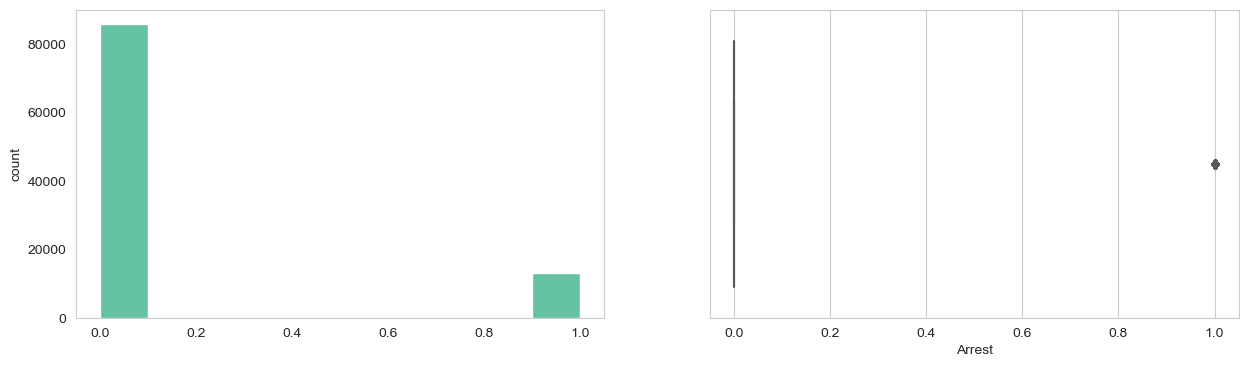

Beat
Skew : 0.35


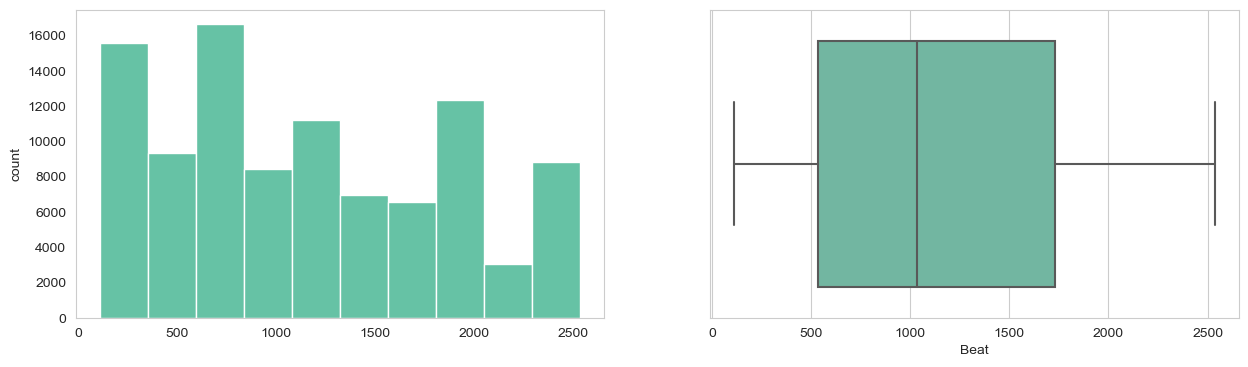

District
Skew : 0.36


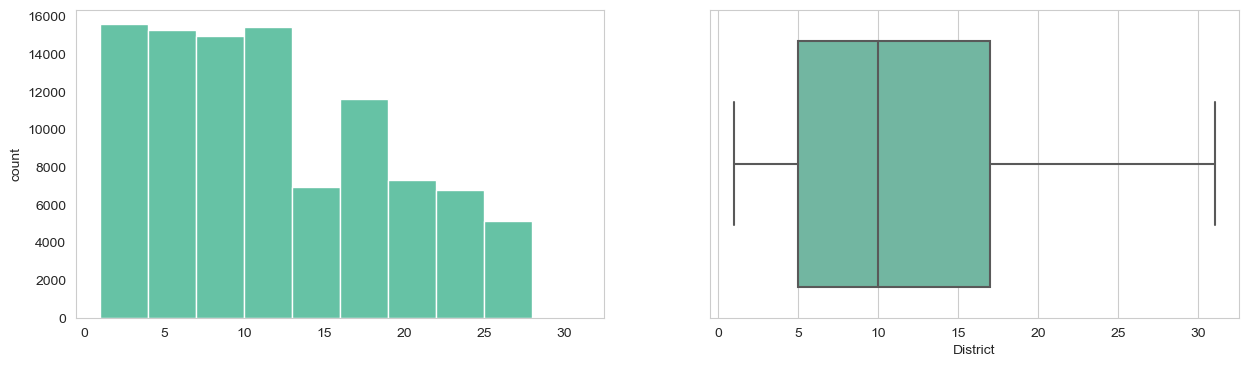

Ward
Skew : 0.19


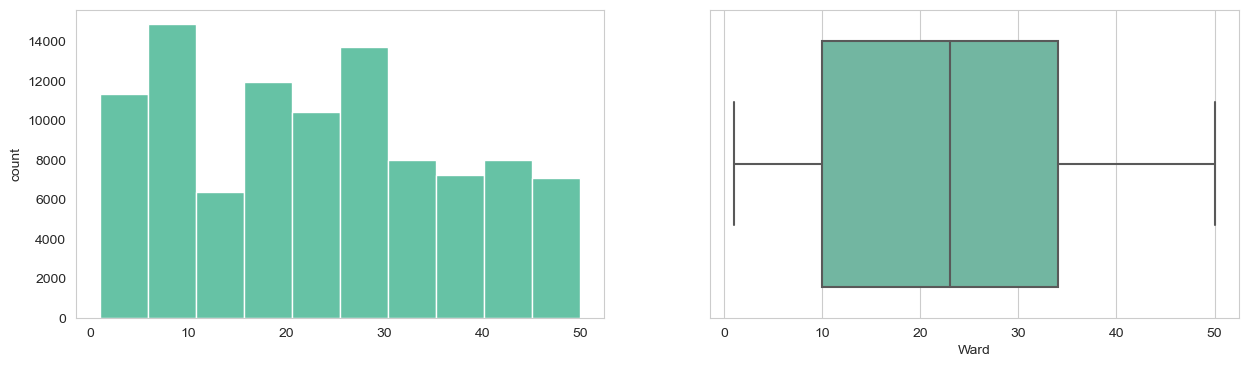

Community Area
Skew : 0.24


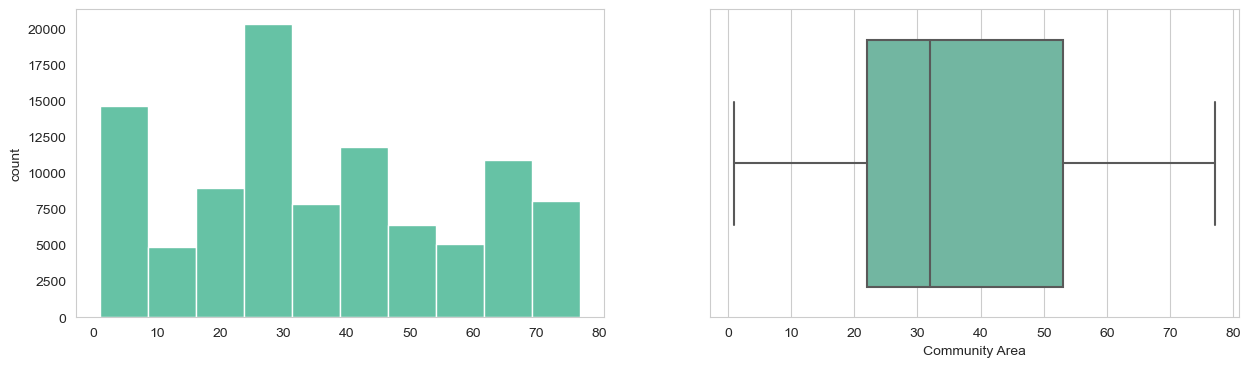

X Coordinate
Skew : -0.39


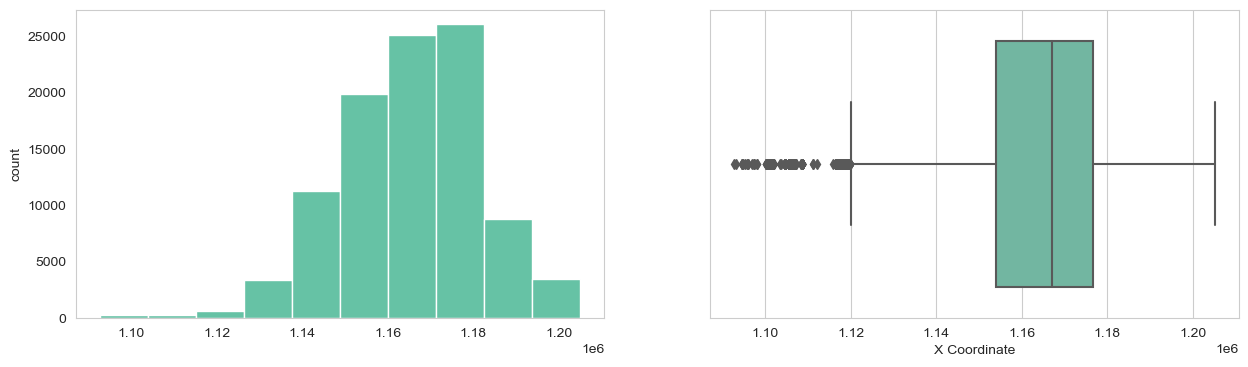

Y Coordinate
Skew : -0.1


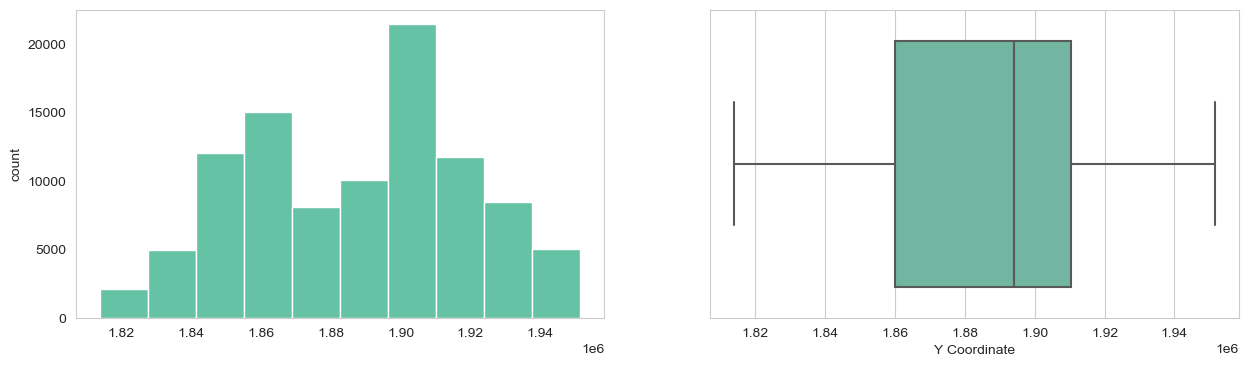

Year
Skew : 0


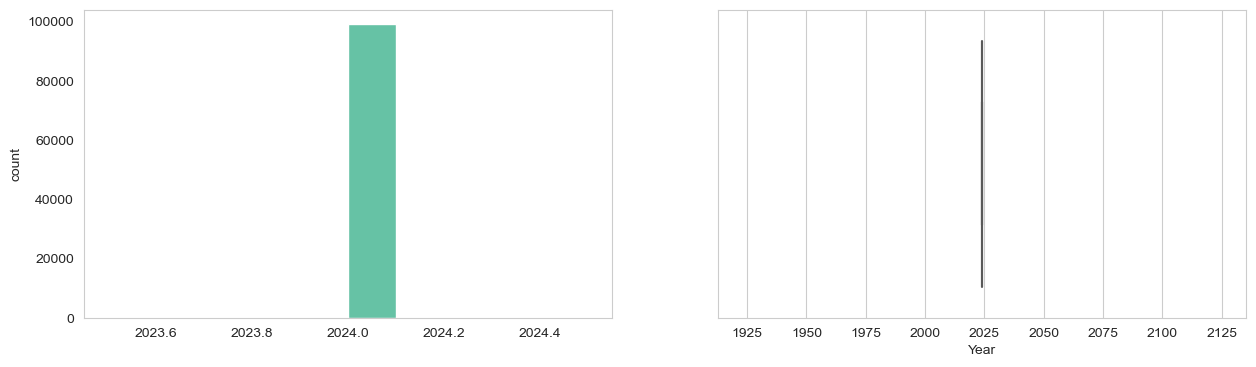

Latitude
Skew : -0.1


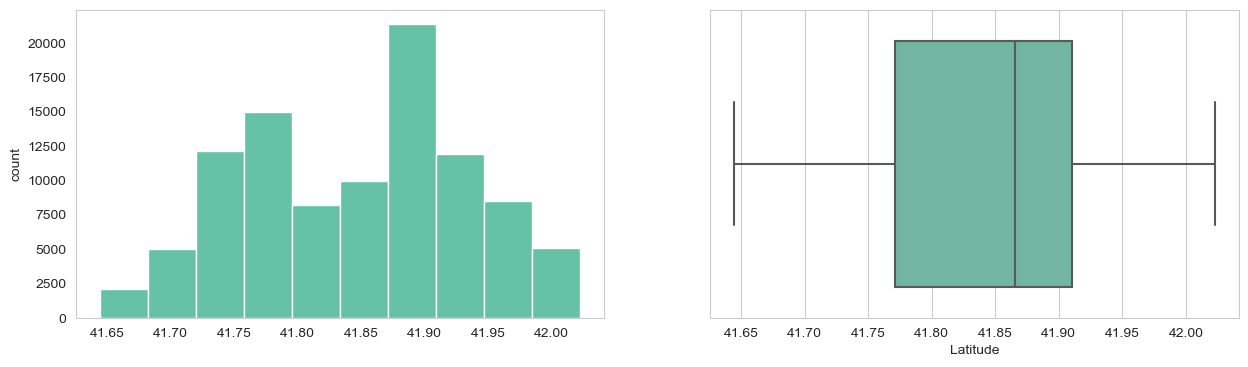

Longitude
Skew : -0.4


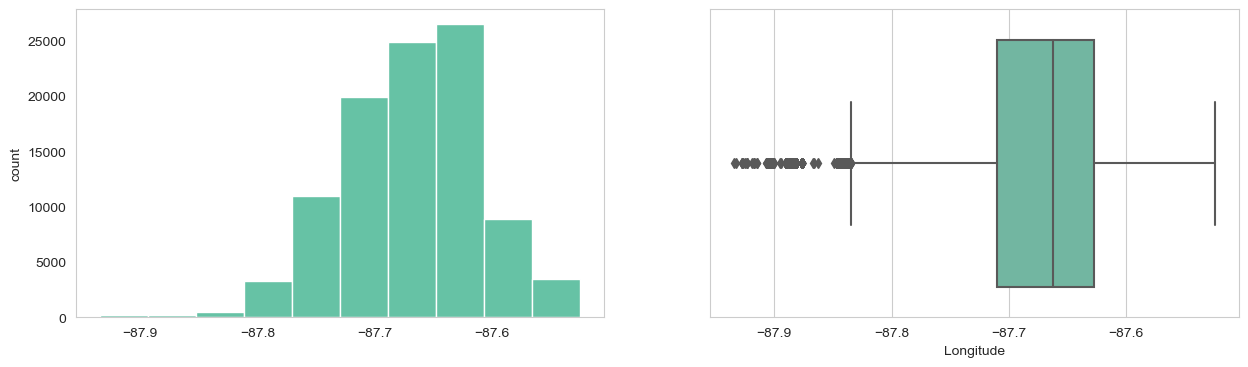

month
Skew : -0.01


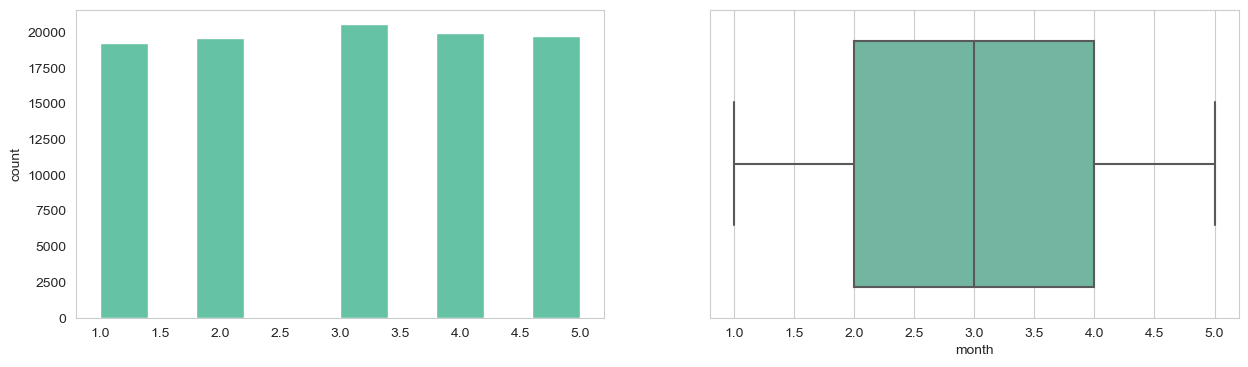

In [120]:
for col in num_cols:
    print(col)
    print('Skew :', round(clean_data[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    clean_data[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=clean_data[col])
    plt.show()


Observations

- Arrest is skewed to the left as there are less arrests made
- all the other numerical features have little skewness ranging between -0.4 to 0.4
- we have a few ouliers in x coordinate and longitude

### Univariate analysis for categorical values

IndexError: index 3 is out of bounds for axis 0 with size 3

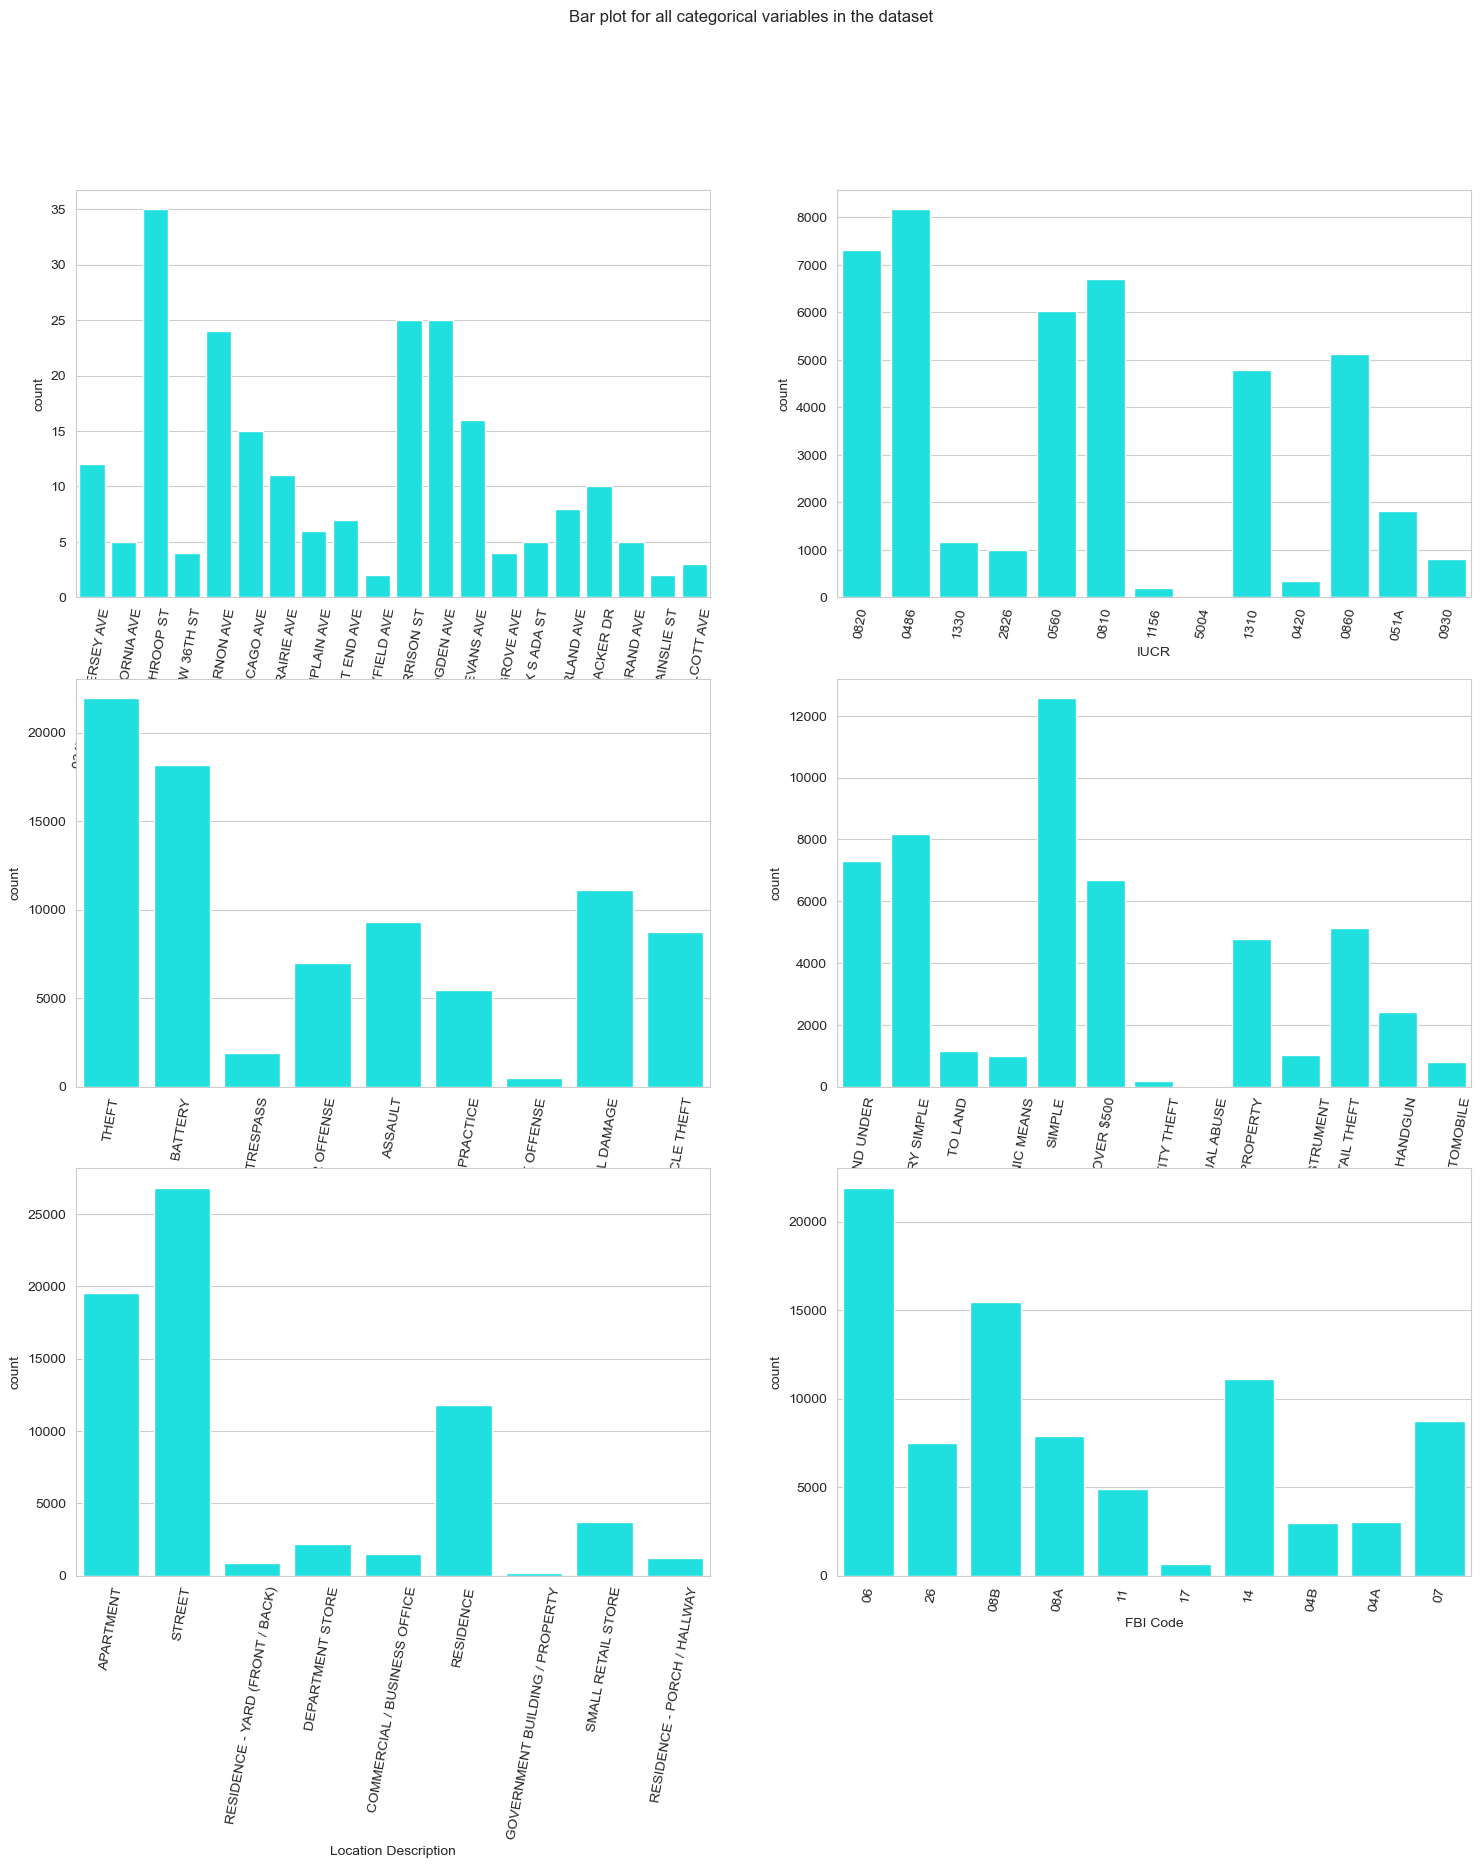

In [127]:
fig, axes = plt.subplots(3, 2, figsize=(18, 18), squeeze = True)
fig.suptitle('Bar plot for all categorical variables in the dataset')

for i, col in enumerate(cat_cols):
    row = i // 2
    col_index = i % 2
    ax = sns.countplot(ax=axes[row, col_index], x=col, data=clean_data, color='cyan',
                  order=clean_data[col].head(20).value_counts().index)
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 80)

plt.show()


Observations
- Most crimes happen on the streets
- Theft is the leading crime followed by battery 

### Check relationship between independent and dependent variables

Arrest is our dependent variable. We will plot it against all the other features.

ValueError: Could not interpret value `Arreat` for parameter `y`

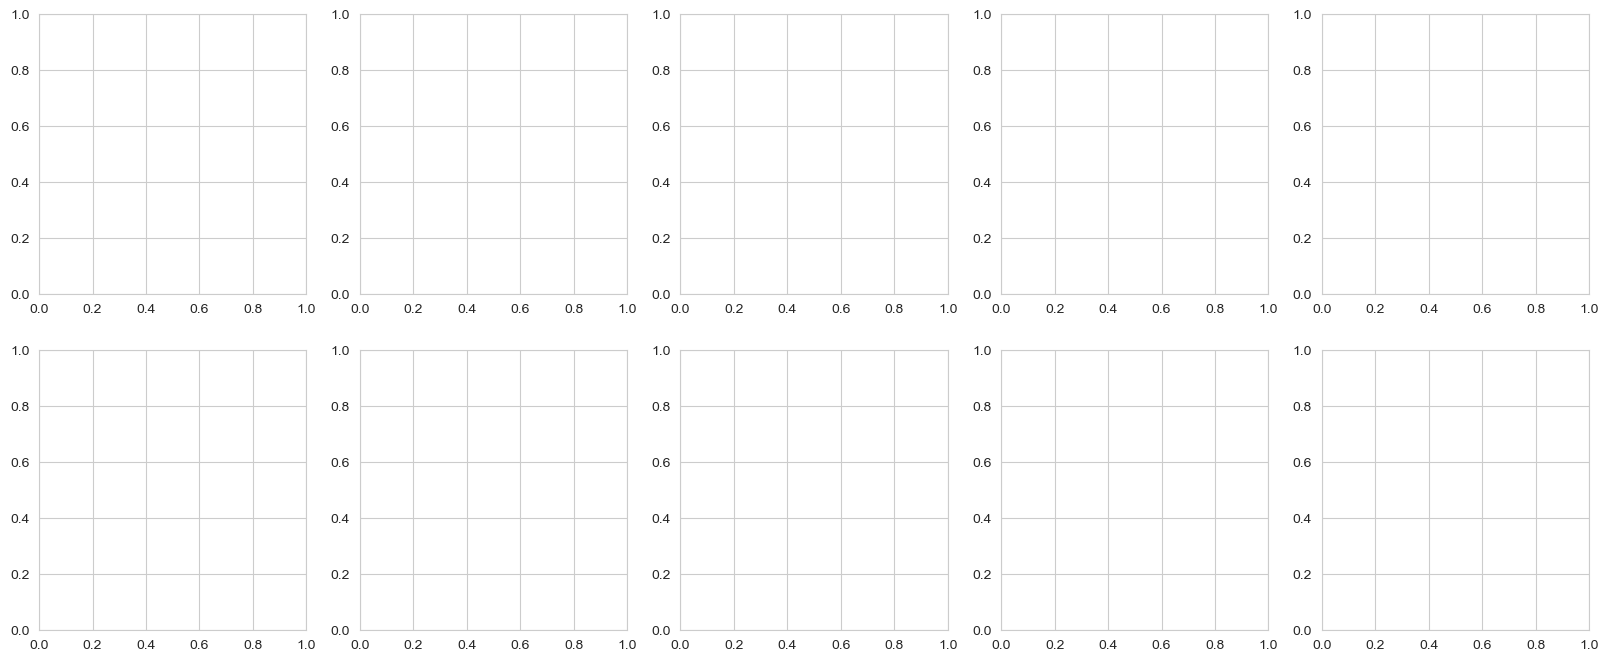

In [129]:
def plot_scatter(df):
    # List of features
    features = cat_cols

    # Calculate the number of rows needed for the plots
    num_rows = len(features) // 5
    if len(features) % 5:
        num_rows += 1

    # Create a figure with the calculated number of rows and 5 columns
    fig, axs = plt.subplots(num_rows, 5, figsize=(20, 4 * num_rows))

    # Flatten the axes array for easy iteration
    axs = axs.flatten()

    # For each feature, create a scatter plot against 'price'
    for i, feature in enumerate(features):
        sns.scatterplot(data=df, x=feature, y='Arreat', ax=axs[i])
        axs[i].set_title(f'Arrest vs {feature}')

    # Remove any extra subplots
    for i in range(len(features), len(axs)):
        fig.delaxes(axs[i])

    # Adjust the layout
    plt.tight_layout()
    plt.show()

# Call the function
plot_scatter(clean_data)

correlation matrix

In [122]:
def plot_corr_matrix(df):
    # Calculate the correlation matrix
    corr = clean_data.corr()

    # Create a figure
    plt.figure(figsize=(20, 20))

    # Generate a heatmap
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)


    # Show the plot
    plt.show()

# Call the function
plot_corr_matrix(clean_data)

ValueError: could not convert string to float: '034XX W DIVERSEY AVE'

Descriptive Statistics for Numerical Features:
                  count         mean         std    min    25%     50%  \
Beat            99054.0  1158.810649  712.210281  111.0  533.0  1033.0   
District        99054.0    11.357926    7.116616    1.0    5.0    10.0   
Ward            99054.0    23.116855   13.946990    1.0   10.0    23.0   
Community Area  99054.0    36.283896   21.668856    1.0   22.0    32.0   
month           99054.0     3.013417    1.404310    1.0    2.0     3.0   

                   75%     max  
Beat            1732.0  2535.0  
District          17.0    31.0  
Ward              34.0    50.0  
Community Area    53.0    77.0  
month              4.0     5.0  


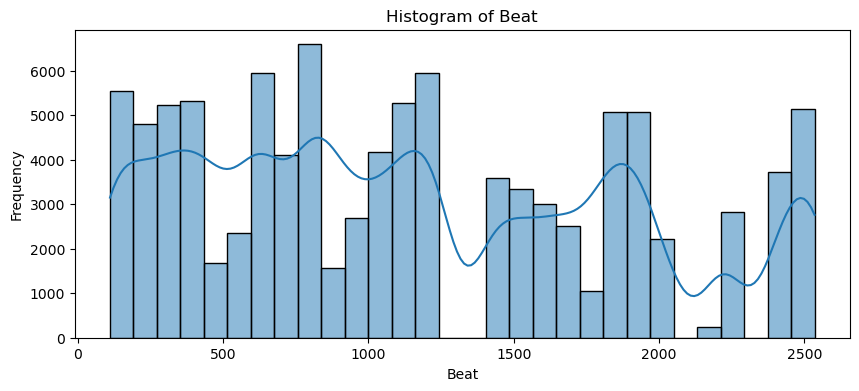

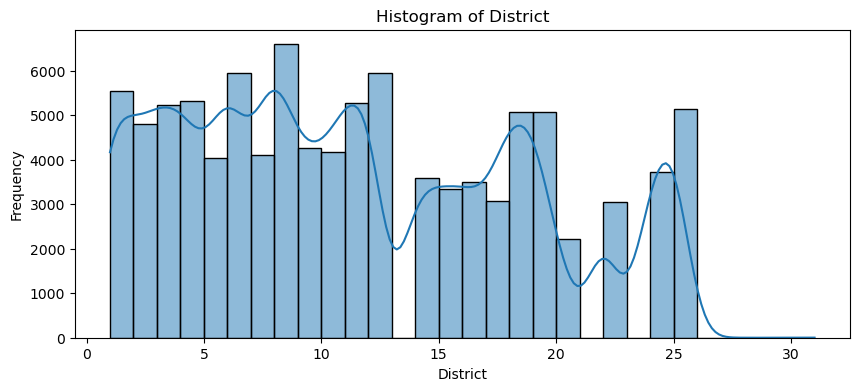

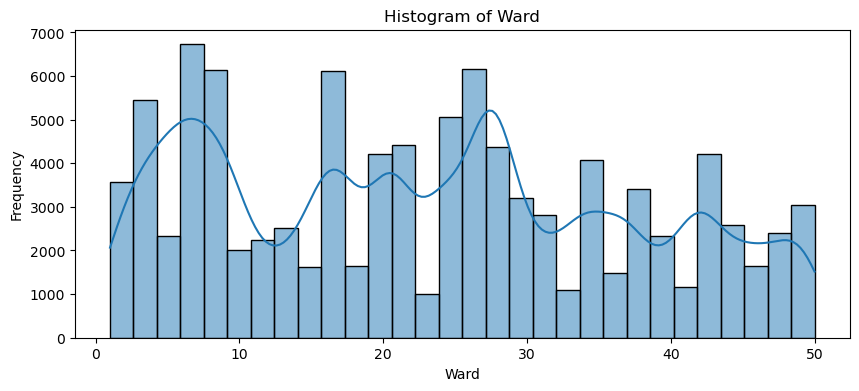

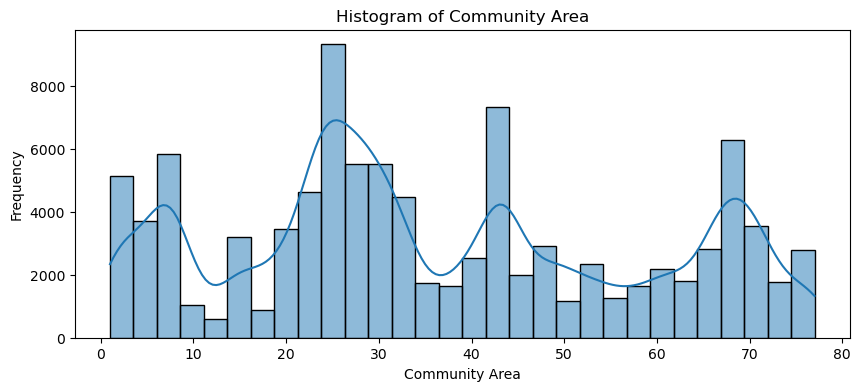

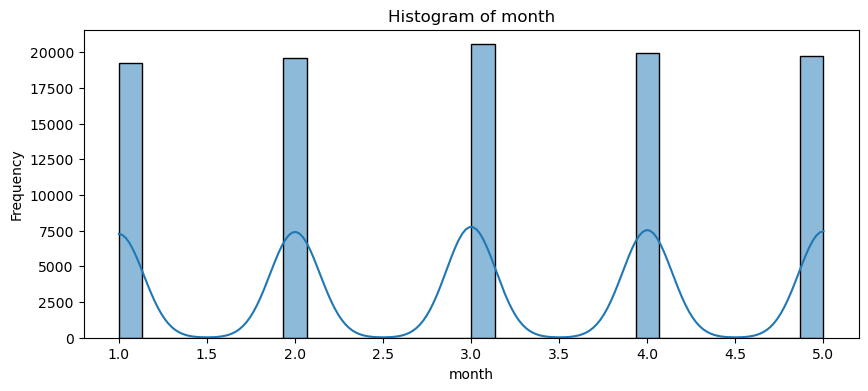

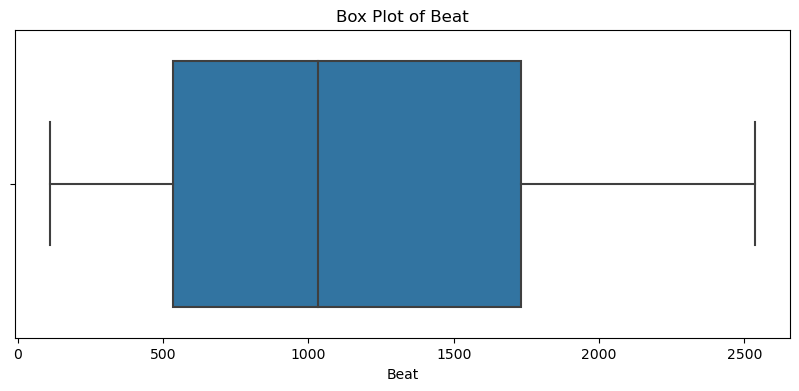

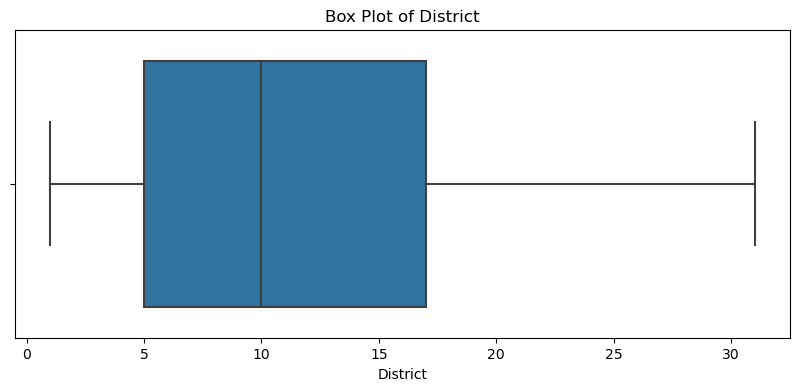

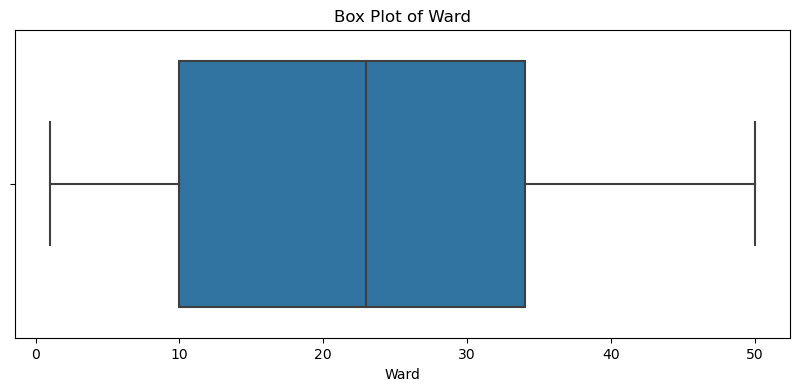

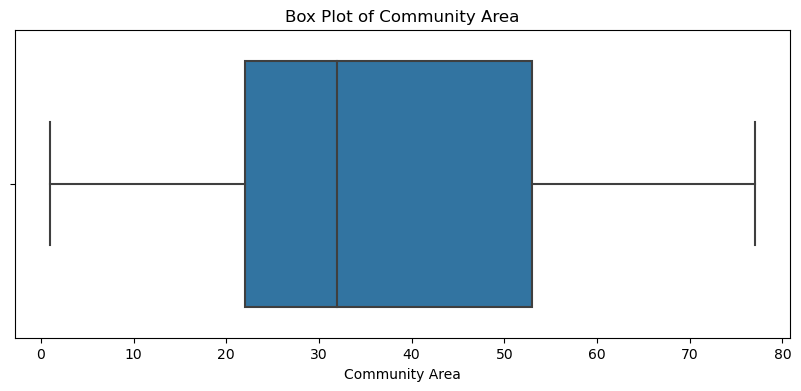

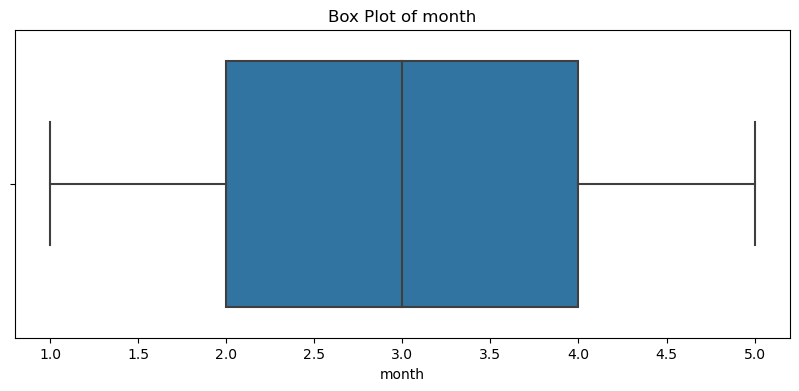

In [86]:
class EDA:
    def __init__(self, data):
        self.data = data

    # Univariate analysis for numerical features
    def univariate_analysis_numerical(self, numerical_features):
        print("Descriptive Statistics for Numerical Features:")
        print(self.data[numerical_features].describe().transpose())
        
        # Plot histograms
        self.plot_histograms(numerical_features)
        
        # Plot box plots
        self.plot_boxplots(numerical_features)

    # Univariate analysis for categorical features
    def univariate_analysis_categorical(self, categorical_features):
        print("\nDescriptive Statistics for Categorical Features:")
        for feature in categorical_features:
            print(f"\n{feature}:")
            print(self.data[feature].value_counts())
        
        # Plot bar charts
        self.plot_barcharts(categorical_features)
    
    # Multivariate analysis
    def multivariate_analysis(self):
        # Correlation matrix for numerical features
        plt.figure(figsize=(12, 10))
        sns.heatmap(self.data.corr(), annot=True, cmap='coolwarm')
        plt.title('Correlation Matrix')
        plt.show()
        
        # Pairplot for numerical features
        sns.pairplot(self.data.select_dtypes(include=['float64', 'int64']))
        plt.title('Pairplot of Numerical Features')
        plt.show()
        
        # Count plot for categorical features
        categorical_features = self.data.select_dtypes(include=['object']).columns
        for feature in categorical_features:
            plt.figure(figsize=(10, 4))
            sns.countplot(data=self.data, y=feature, order=self.data[feature].value_counts().index)
            plt.title(f'Count Plot of {feature}')
            plt.show()

    # Helper functions to plot histograms, box plots, and bar charts
    def plot_histograms(self, features):
        for feature in features:
            plt.figure(figsize=(10, 4))
            sns.histplot(self.data[feature], bins=30, kde=True)
            plt.title(f'Histogram of {feature}')
            plt.xlabel(feature)
            plt.ylabel('Frequency')
            plt.show()

    def plot_boxplots(self, features):
        for feature in features:
            plt.figure(figsize=(10, 4))
            sns.boxplot(x=self.data[feature])
            plt.title(f'Box Plot of {feature}')
            plt.xlabel(feature)
            plt.show()

    def plot_barcharts(self, features):
        for feature in features:
            plt.figure(figsize=(10, 4))
            sns.countplot(y=self.data[feature], order=self.data[feature].value_counts().index)
            plt.title(f'Bar Chart of {feature}')
            plt.xlabel('Count')
            plt.ylabel(feature)
            plt.show()
            
# Create an EDA instance
eda = EDA(data_loader.data)

# Univariate analysis for numerical features
numerical_features = ['Beat', 'District', 'Ward', 'Community Area', 'month',]

eda.univariate_analysis_numerical(numerical_features)


### Univariate analysis for categorical features

In [ ]:
# Univariate analysis for categorical features
categorical_features = ['Case Number', 'Block', 'IUCR', 'Primary Type', 'Description', 'Location Description', 'Arrest', 'Domestic', 'FBI Code', 'Updated On', 'Location']
eda.univariate_analysis_categorical(categorical_features)



Descriptive Statistics for Categorical Features:

Case Number:
Case Number
JH165644    3
JH232120    2
JH166819    2
JH277783    2
JH208794    2
           ..
JH222553    1
JH221002    1
JH220999    1
JH226961    1
JH274951    1
Name: count, Length: 99044, dtype: int64

Block:
Block
001XX N STATE ST         312
0000X N STATE ST         224
0000X W TERMINAL ST      185
011XX S CANAL ST         169
076XX S CICERO AVE       148
                        ... 
082XX S FAIRFIELD AVE      1
058XX S HAMLIN AVE         1
045XX W CHICAGO AVE        1
006XX E 31ST DR            1
062XX W ESTES AVE          1
Name: count, Length: 22246, dtype: int64

IUCR:
IUCR
0486    8173
0820    7307
0810    6695
0460    6421
0910    6248
        ... 
0482       1
1450       1
1564       1
1900       1
1566       1
Name: count, Length: 284, dtype: int64

Primary Type:
Primary Type
THEFT                                21934
BATTERY                              18180
CRIMINAL DAMAGE                      11118
ASSA

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x0000027287558900> (for post_execute):



KeyboardInterrupt



Error in callback <function flush_figures at 0x00000272945A8D60> (for post_execute):


### Multivariate analysis

In [ ]:
# Multivariate analysis
eda.multivariate_analysis()

In [43]:
class EDA:
    def __init__(self, filepath):
        self.df = pd.read_csv(filepath)
        self.df['Date'] = pd.to_datetime(self.df['Date'], errors='coerce')
        self.df['Updated On'] = pd.to_datetime(self.df['Updated On'], errors='coerce')
    
    def univariate_analysis(self):
        self.univariate_numerical()
        self.univariate_categorical()
    
    def univariate_numerical(self):
        numerical_cols = ['Beat', 'District', 'Ward', 'Community Area', 'month', 'Latitude', 'Longitude']
        summary = self.df[numerical_cols].describe()
        #summary.to_csv('/mnt/data/univariate_numerical_summary.csv')
        for col in numerical_cols:
            plt.figure(figsize=(10, 5))
            sns.histplot(self.df[col].dropna(), kde=True)
            plt.title(f'Histogram of {col}')
            #plt.savefig(f'/mnt/data/histogram_{col}.png')
            #plt.close()
    
    def univariate_categorical(self):
        categorical_cols = ['Primary Type', 'Description', 'Location Description', 'Arrest', 'Domestic']
        for col in categorical_cols:
            plt.figure(figsize=(10, 5))
            sns.countplot(y=self.df[col], order=self.df[col].value_counts().index)
            plt.title(f'Count plot of {col}')
            #plt.savefig(f'/mnt/data/countplot_{col}.png')
            #plt.close()
    
    def multivariate_analysis(self):
        self.correlation_matrix()
        self.pairplot()
    
    def correlation_matrix(self):
        numerical_cols = ['Beat', 'District', 'Ward', 'Community Area', 'month', 'Latitude', 'Longitude']
        plt.figure(figsize=(15, 10))
        sns.heatmap(self.df[numerical_cols].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
        plt.title('Correlation Matrix')
        #plt.savefig('/mnt/data/correlation_matrix.png')
        #plt.close()
    
    def pairplot(self):
        numerical_cols = ['Beat', 'District', 'Ward', 'Community Area', 'month']
        sns.pairplot(self.df[numerical_cols].dropna())
        plt.title('Pairplot of Selected Numerical Features')
        #plt.savefig('/mnt/data/pairplot.png')
        #plt.close()

# Example usage
eda = EDA(df_clean)
eda.univariate_analysis()
eda.multivariate_analysis()
eda.correlation_matrix()
eda.pairplot()


TypeError: argument of type 'method' is not iterable

In [ ]:

class ModelBuilder:
    def __init__(self, df):
        self.df = df
        self.model = None

    def prepare_data(self):
        X = self.df.drop(columns=['arrest'])
        y = self.df['arrest']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        return X_train, X_test, y_train, y_test

    def train_model(self, X_train, y_train):
        self.model = RandomForestClassifier(n_estimators=100, random_state=42)
        self.model.fit(X_train, y_train)
        return self.model

    def evaluate_model(self, X_test, y_test):
        y_pred = self.model.predict(X_test)

        conf_matrix = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(6,4))
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
        plt.title('Confusion Matrix')
        plt.ylabel('Actual')
        plt.xlabel('Predicted')
        plt.show()

        print(classification_report(y_test, y_pred))
        accuracy = accuracy_score(y_test, y_pred)
        print(f'Accuracy: {accuracy:.2f}')

## Main Execution



# Model Building
model_builder = ModelBuilder(df_encoded)
X_train, X_test, y_train, y_test = model_builder.prepare_data()
model = model_builder.train_model(X_train, y_train)
model_builder.evaluate_model(X_test, y_test)
        
        


KeyError: "['arrest'] not found in axis"